# Your Name Here: Rhami Thrower

# A4 Unsupervised Learning algorithms (Total 75 points)

## 1. Feature Preprocessing (Total 5 points)

### 1.1 Import numpy, matplotlib, pandas and seaborn (1pt)

In [ ]:
# TODO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### 1.2 Load the dataset from given *.csv file using *pandas* (1pt)

In [ ]:
# uncomment the following line if you are running this code in google colab and have uploaded the dataset to your drive
from google.colab import drive
drive.mount('/content/drive')

# TODO
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Wine_Quality_Data.csv')


Mounted at /content/drive


### 1.3 We want to use only the numeric features. So drop the 'color' column from the dataframe. (1pt)

In [ ]:
# TODO
df = df.drop(['color'], axis = 1, errors = 'ignore')

### 1.4 Scale the features using Scikitlearn's StandardScaler library (2pt)

In [ ]:
# TODO
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)

## 2. KMeans Clustering with PCA selection (Total 25 points)

### 2.1 Import PCA from scikitlearn's decomposition library.  (3pt)
Use fit_transform method on the scaled data to get the PCA transformed data.

In [ ]:
# TODO
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(df)

array([[-3.34843817,  0.56892617, -2.72738565, ..., -0.0691407 ,
        -0.10424905,  0.02764316],
       [-3.22859545,  1.19733465, -1.99890417, ..., -0.44915958,
        -0.2582509 , -0.01446934],
       [-3.23746833,  0.95258001, -1.7465779 , ..., -0.27288796,
        -0.0816135 ,  0.05396092],
       ...,
       [ 0.62692235, -0.62214478, -0.14948285, ..., -0.44935488,
        -0.33788036,  0.16362679],
       [ 0.49193416, -3.75592792, -0.08028411, ..., -0.33366769,
         0.27850001,  0.059468  ],
       [ 0.76155534, -2.7678397 ,  0.17681956, ..., -0.09970173,
        -0.12137327,  0.00662108]])

### 2.2 Plot the cumulative sum of explained_variance_ratio_. You can retrieve this quantity from the PCA-transformed data in the previous step. (4pt)
This plot should show the set of features along X axis and proportion of variance explained by each of the features along Y axis. You can use matplotlib's plot and step function for this.

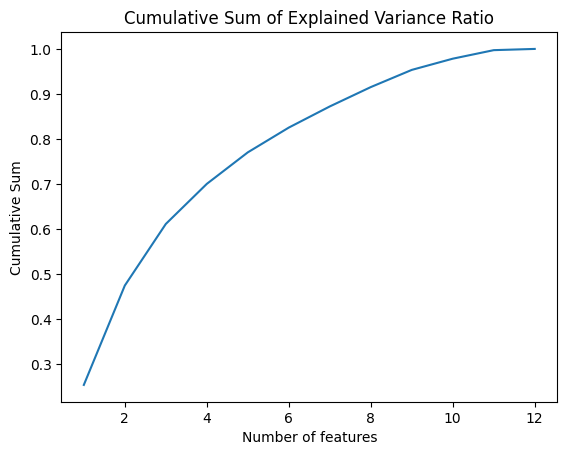

In [ ]:
# TODO
ex_vr = pca.explained_variance_ratio_
cumulative_ex_vr = np.cumsum(ex_vr)
features = df.shape[1]
plt.plot(range(1, features+1),cumulative_ex_vr)
plt.title('Cumulative Sum of Explained Variance Ratio')
plt.xlabel('Number of features')
plt.ylabel('Cumulative Sum')
plt.show()

### 2.3 How many features are required to capture at least 90% of the variance? Drop the other features. (3pt)
You can get this number visually from the cumulative sum of explained_variance_ratio_ plot in the previous step. Alternatively, you can use numpy's *argwhere* function to find the index of the first element in the cumulative sum array that is greater than 0.9.

In [ ]:
# TODO
number_components = np.argmax(cumulative_ex_vr >= .9) + 1
sort_i = np.argsort(ex_vr)[::-1]
select_i = sort_i[: number_components]
new_df = df[:,select_i]
new_df = pd.DataFrame(new_df)

### 2.4 Import KElbowVisualizer from yellowbrick.cluster library and fit the data to it. Visualize the elbow curve and find the optimal number of clusters. (6pt)

*KElbowVisualizer* is a useful visualization tool for using Elbow method with K-Means clustering algorithm. The official documentation and example can be found here:
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

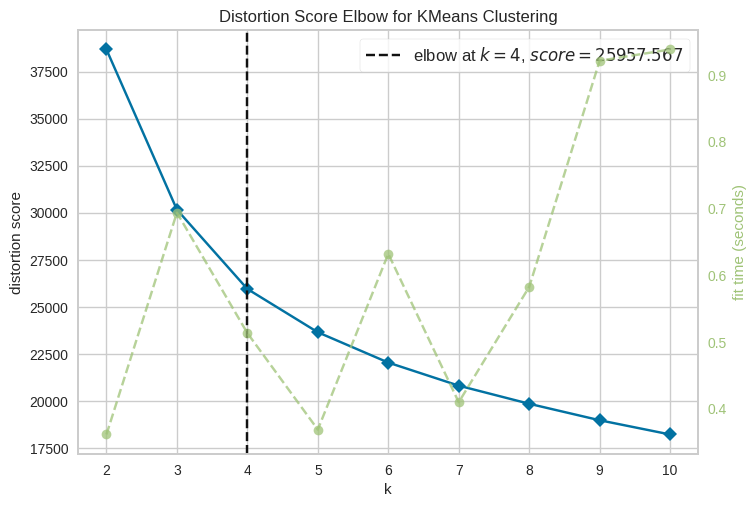

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# TODO
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

x,y = make_blobs(n_samples = 10000, random_state = 42)
model = KMeans()

vis = KElbowVisualizer(model)

vis.fit(new_df)
vis.show()

### 2.5 Instantiate a KMeans object with the optimal number of clusters (from previous step) and fit the data to it. (2pt)

In [ ]:
# TODO
k = KMeans(n_clusters= 4)
k.fit(new_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

### 2.6 Get the labels from the fitted KMeans object (*labels_* method). Import *silhouette_score* from scikitlearn's metrics library. Print (1) the value counts of unique class labels in percentage, and (2) print the corresponding silhouette score. (1+1+2+3 =7pts)

In [ ]:
# TODO
from sklearn.metrics import silhouette_score

labels = k.labels_
counts = np.bincount(labels)
valCountsPercent = np.round(100 * counts / len(labels),2)
print(valCountsPercent)
silhScore = silhouette_score(new_df,labels)
print(silhScore)

[10.07 46.34 15.67 27.92]
0.2998932974913437


## 3. KMeans Clustering without PCA selection (Total 15 points)

### 3.1 Use KElbowVisualizer to find the optimal number of clusters for the data without PCA selection (ie the data with all the features). Also plot the score (similar to step 2.4) (3pt)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

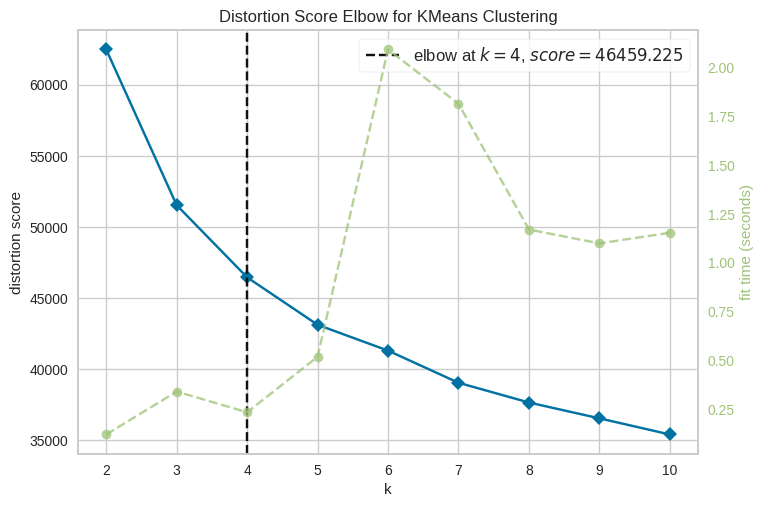

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# TODO
""" for ploting the score would that mean the silhouette score or......"""
model = KMeans()

vis = KElbowVisualizer(model)

vis.fit(df)
vis.show()

### 3.2 Instantiate a KMeans object with the optimal number of clusters (from previous step) and fit the data (without PCA selection) to it. (2pt)

In [ ]:
# TODO
k = KMeans(n_clusters= 4)
k.fit(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

### 3.3 Retrieve the class labels from this KMeans object (from model's *labels_* method). Print (1) the value counts of unique class labels in percentage, and (2) print the corresponding silhouette score for the fitted data (without PCA selection) (2+2+3 =7pt)

In [ ]:
# TODO
labels = k.labels_
counts = np.bincount(labels)
valCountsPercent = np.round(100 * counts / len(labels),2)
print(valCountsPercent)
silhScore = silhouette_score(new_df,labels)
print(silhScore)

[43.57 10.14 29.89 16.39]
0.2774535795359792


### 3.4 Discussion: Did PCA selection help in clustering (did it yield higher silhouette score)? Why or why not? (2-3 sentences) (3pt)

so it dosn't seem that PCA dind't help in clustering nor did it impact the silhouette scores. This is probably given from the fact that when we did PCA selection we dropped that didn't yield anything to the 90% varience and thus that only left 10% to impact both the selection and the scores which may only impact the data minorly. However it does seem that the PCA did impact the fit time by a marginal ammount which means that PCA selection probably aids more computationaly wise compared to product wise.


## 4. Hierarchical (agglomerative) clustering (Total 10 points)

### 4.1 Import dendogram and linkage from scipy.cluster.hierarchy library. Use the *linkage* function to fit the data and plot the dendogram. (5pt)
An example is provided in the lecture slide.

Official Documentation:
https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

With the *linkage* function, you can use different linkage methods. For this assignment you can use 'ward' method.

(https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage:~:text=method%3D%E2%80%99ward%E2%80%99%20uses,the%20incremental%20algorithm.)


(This can take a while to complete running)

In [ ]:
# TODO
from scipy.cluster.hierarchy import dendrogram, linkage

link = linkage(new_df, 'ward')

figure = plt.figure(figsize=(250,100))

dn = dendrogram(link)
plt.show()

### 4.2 Import AgglomerativeClustering from sklearn.cluster library. Use the fit_predict method to fit the data and print the corresponding silhouette score. (5pt)
(Use the above dendogram to find a suitable value for the number of clusters (*k*) in AgglomerativeClustering, OR run the algorithm multiple times with different values of *k* and print the *k* with the highest silhouette score)

In [ ]:
# TODO
from sklearn.cluster import AgglomerativeClustering


angler = AgglomerativeClustering(n_clusters = 2)
angler.fit_predict(new_df)
labels = angler.labels_
print(silhouette_score(new_df,labels))


0.3168979936035671


## 5. DBSCAN Clustering (Total 20 points)

### 5.1 Import *NearestNeighbors* from sklearn.neighbors library. Use the *fit* method to fit the data with n_neighbors=4. Then use *kneighbors* method to find the distance of the 4th nearest neighbor for each point. Sort and plot the distances. (6pt)
This plots the elbow curve (distance of the 4th nearest neighbor for each point). This is useful for finding the optimal value of epsilon for DBSCAN clustering.

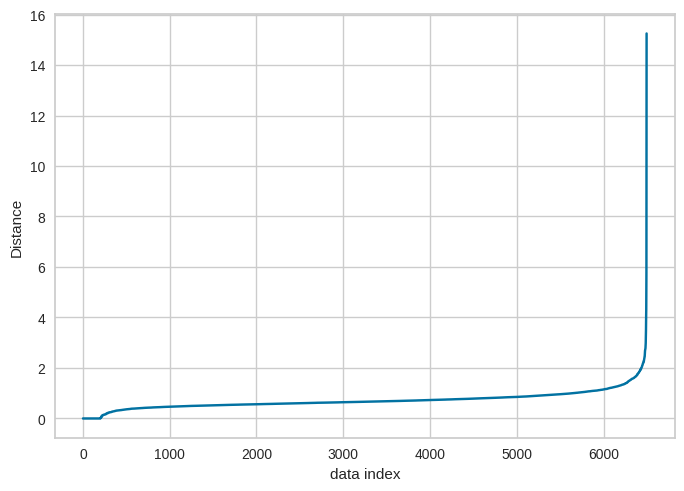

In [ ]:
from scipy.spatial import distance
# TODO
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors = 4)
neigh.fit(new_df)

Neighdist, Neighind = neigh.kneighbors(new_df)
sortedNeigh = np.sort(Neighdist[:,3])

plt.plot(sortedNeigh)
plt.xlabel('data index')
plt.ylabel('Distance')
plt.show()

### 5.2 From the distance plot above, estimate the 'elbow' point. The distance at the elbow point will be used as epsilon in the DBSCAN model. (2pt)
Simply write the distance value in the cell below.

The distance value is about 1.8 so if you round up 2.

### 5.3 Import DBSCAN from sklearn.cluster library. Instantiate a DBSCAN model (with eps set to the elbow point suggested by above plot, and min_samples=10). (2pt)
(You can experiment with several values of eps and min_samples to find the best combination)

In [ ]:
# TODO
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 1.8, min_samples = 10)

### 5.4 Use the fit method to fit your model to the data. Print (1) the value counts of unique class labels (from model's *labels_* method) in percentage, and (2) print the corresponding silhouette score. (2+2+2=6pt)

In [ ]:
# TODO
db.fit(new_df)

labels = db.labels_
ul,lc = np.unique(db.labels_,return_counts = True)
valCountsPercent = np.round(100 * counts / len(labels),2)
print(valCountsPercent)
silhScore = silhouette_score(new_df,labels)
print(silhScore)

[43.57 10.14 29.89 16.39]
0.5200007134397642


### 5.5 Use seaborn's pairplot to plot the data with *hue* as the cluster labels obtained from DBSCAN. (2pt)
Set *corner* to *True* for a better visualization.

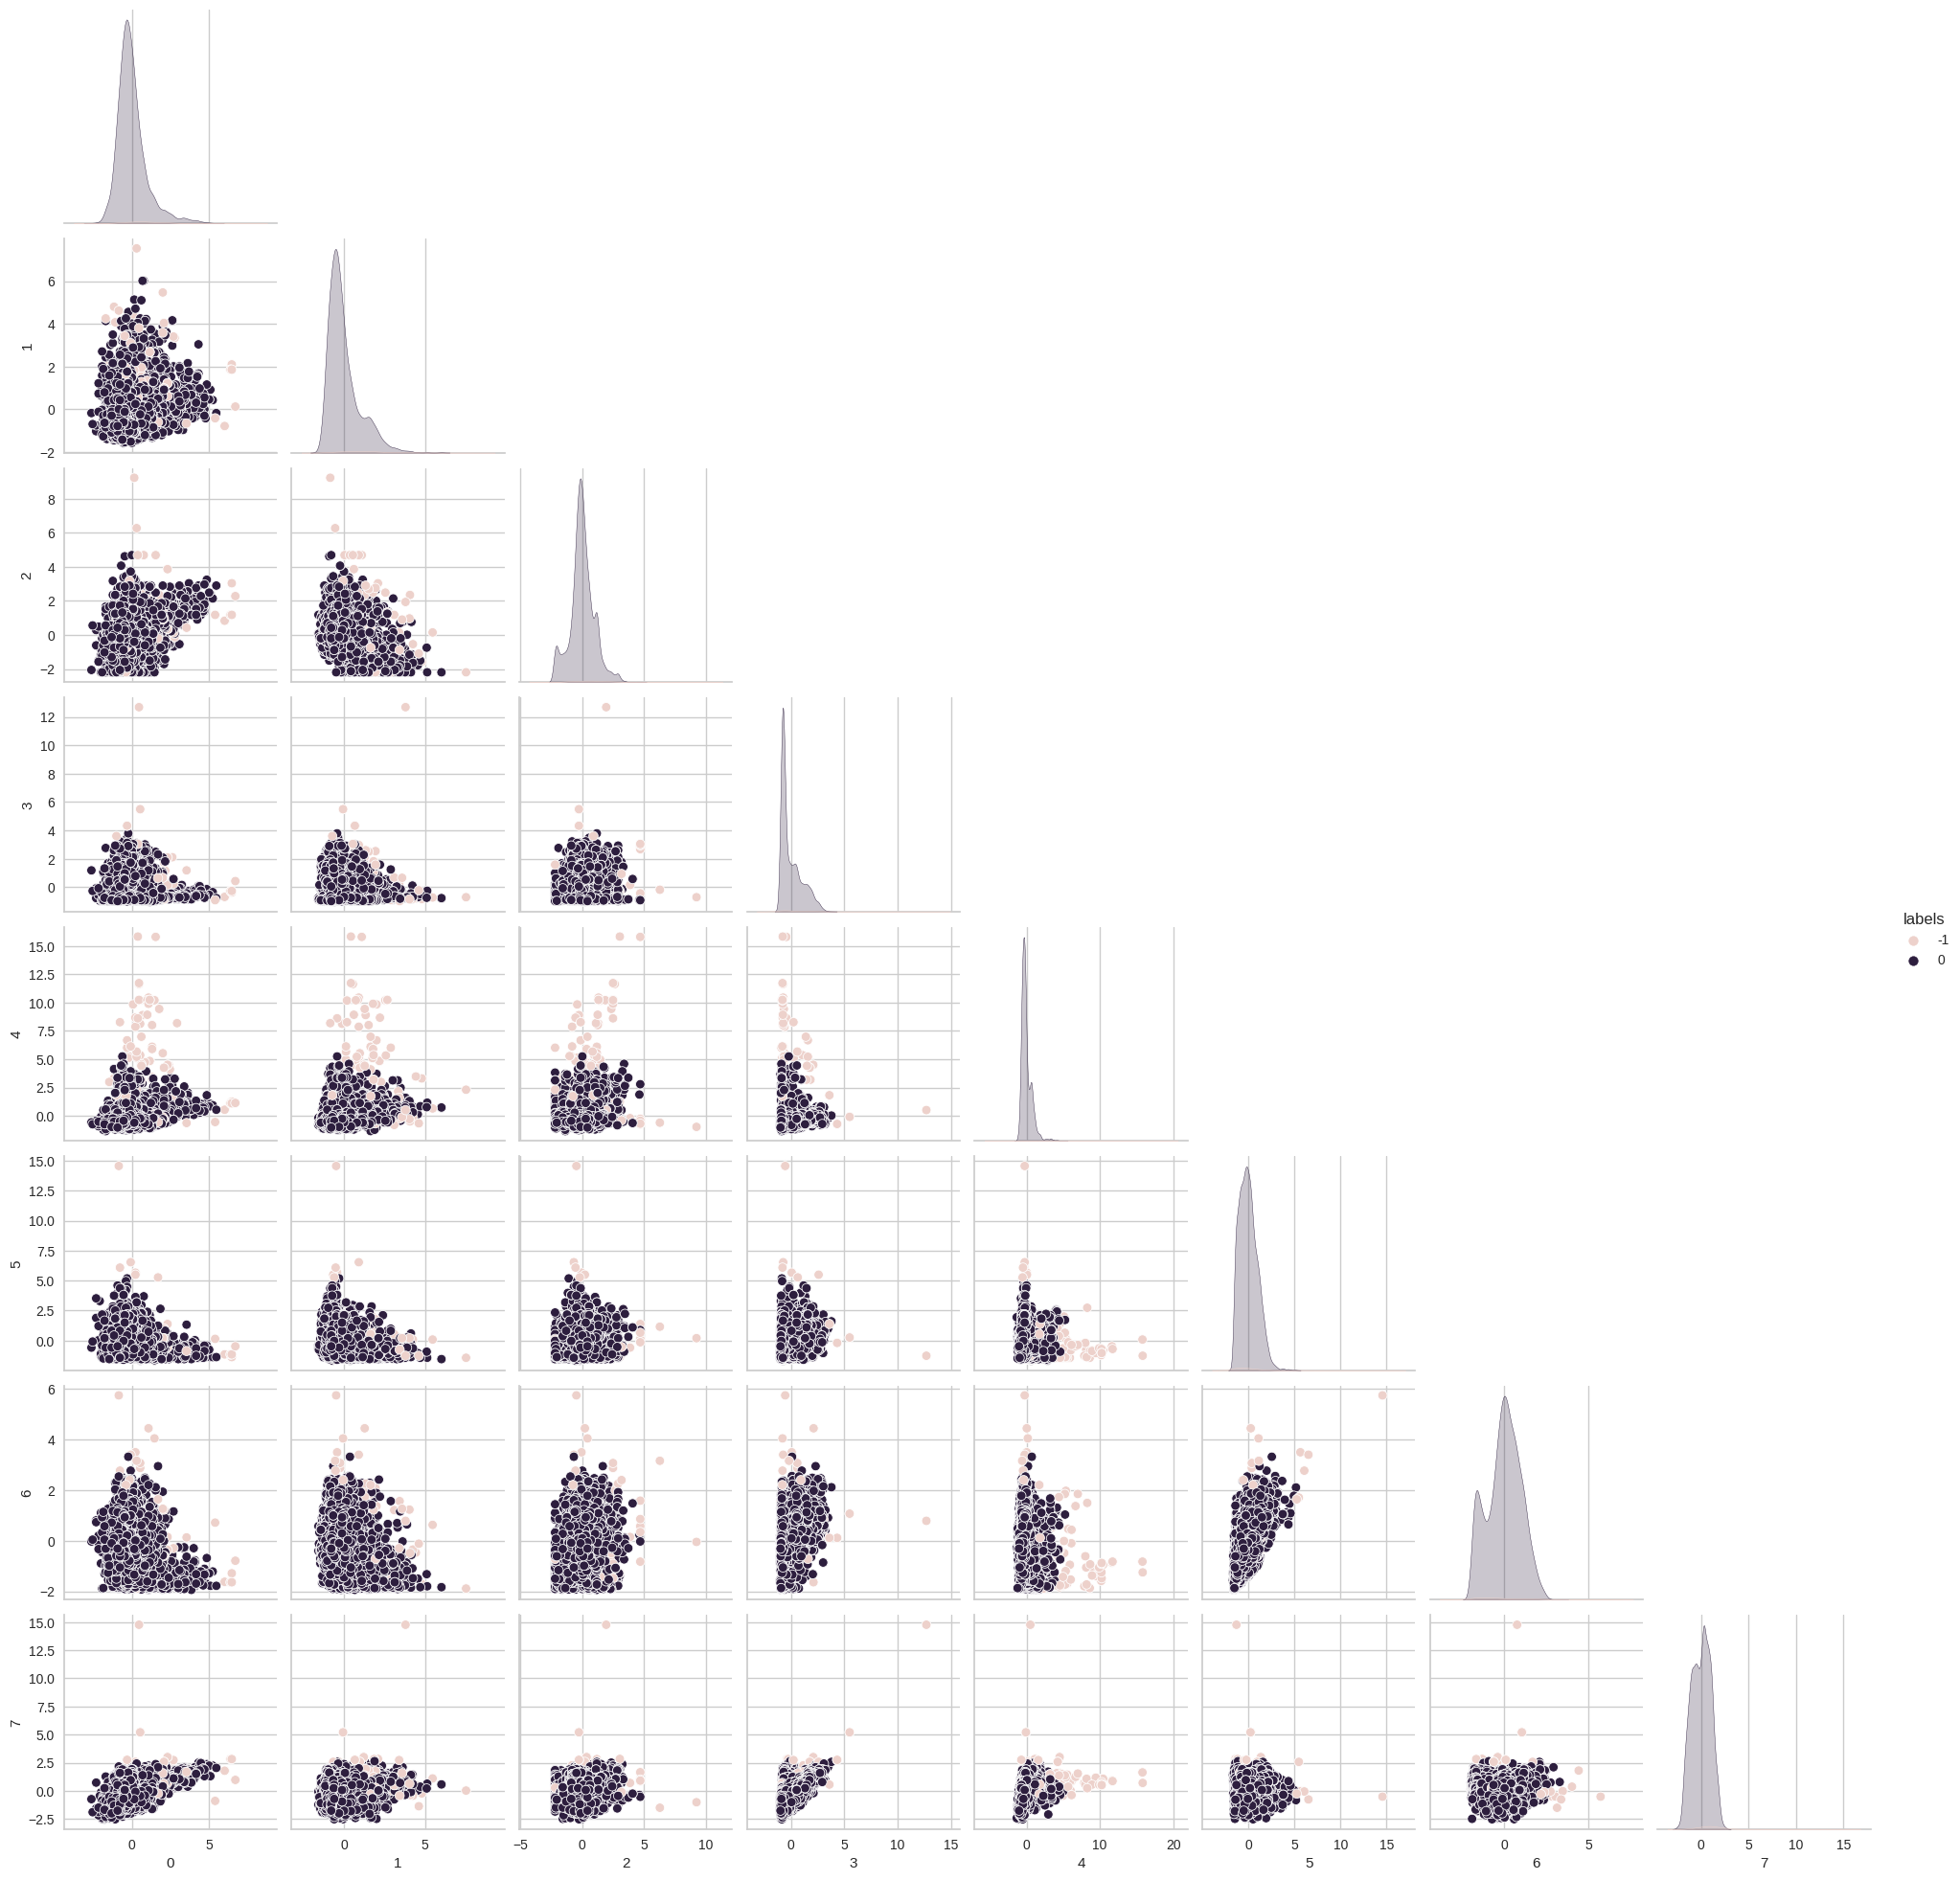

In [ ]:
# TODO
""" what is data suppose to be """
new_df['labels'] = labels
sns.pairplot(new_df, hue = 'labels', corner = True)
plt.show()

## 6. Discussion: which clustering algorithm performed the best? Why? (2pt)
 (2-3 sentences)

It seems from the data that the Dbscan cluster performed the best overall. This is given from its silhouette score which is better then the second best by 21%.this means that the dbscan performed better overall in identifing its own class for a given cluster. also it seems to run at a moderate speed compared to the other algorithms.
